In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('benchmark_data.txt')

def visualize(test_name, title):
    # Data preparation
    data = df[df["Test_Name"] == test_name]
    test_data_values = data["Test_Data"].unique()
    
    fig, axs = plt.subplots(
        nrows=len(test_data_values), ncols=3, figsize=(18, len(test_data_values) * 5)
    )
    fig.suptitle(title)

    metrics = ["RMSE_Mean", "MAE_Mean", "Time"]
    metric_titles = ["RMSE Mean", "MAE Mean", "Time"]
    colors = ["skyblue", "mediumvioletred", "yellowgreen"]

    for i, test_data in enumerate(test_data_values):
        sub_data = data[data["Test_Data"] == test_data]

        for j, (metric, metric_title, color) in enumerate(zip(metrics, metric_titles, colors)):
            ax = axs[i, j]
            sub_data.plot(kind="bar", x="Train_Data", y=metric, ax=ax, color=color, legend=False)
            ax.set_title(f"{metric_title} ({test_data})")
            ax.set_xlabel("Train Data")
            ax.set_ylabel(metric)

            y_min = sub_data[metric].min()
            y_max = sub_data[metric].max()
            ax.set_ylim(y_min * 0.95, y_max * 1.05)

    fig.tight_layout(pad=3.0, rect=[0, 0.03, 1, 0.95])
    plt.show()

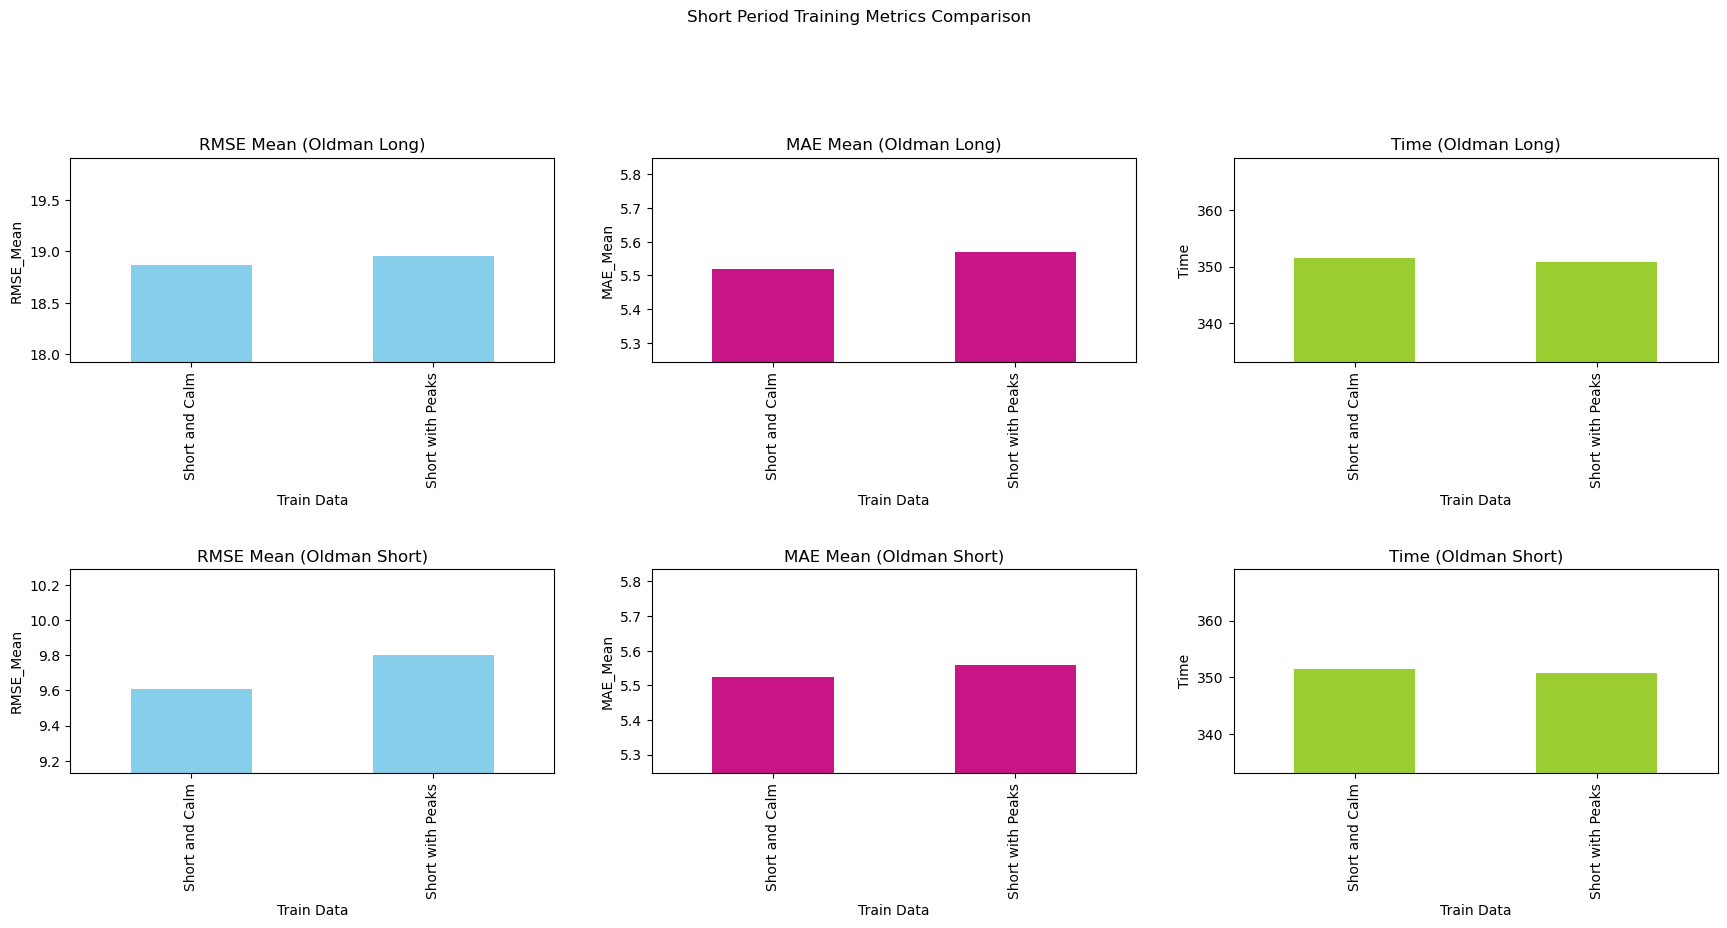

In [3]:
visualize("short_train", "Short Period Training Metrics Comparison")

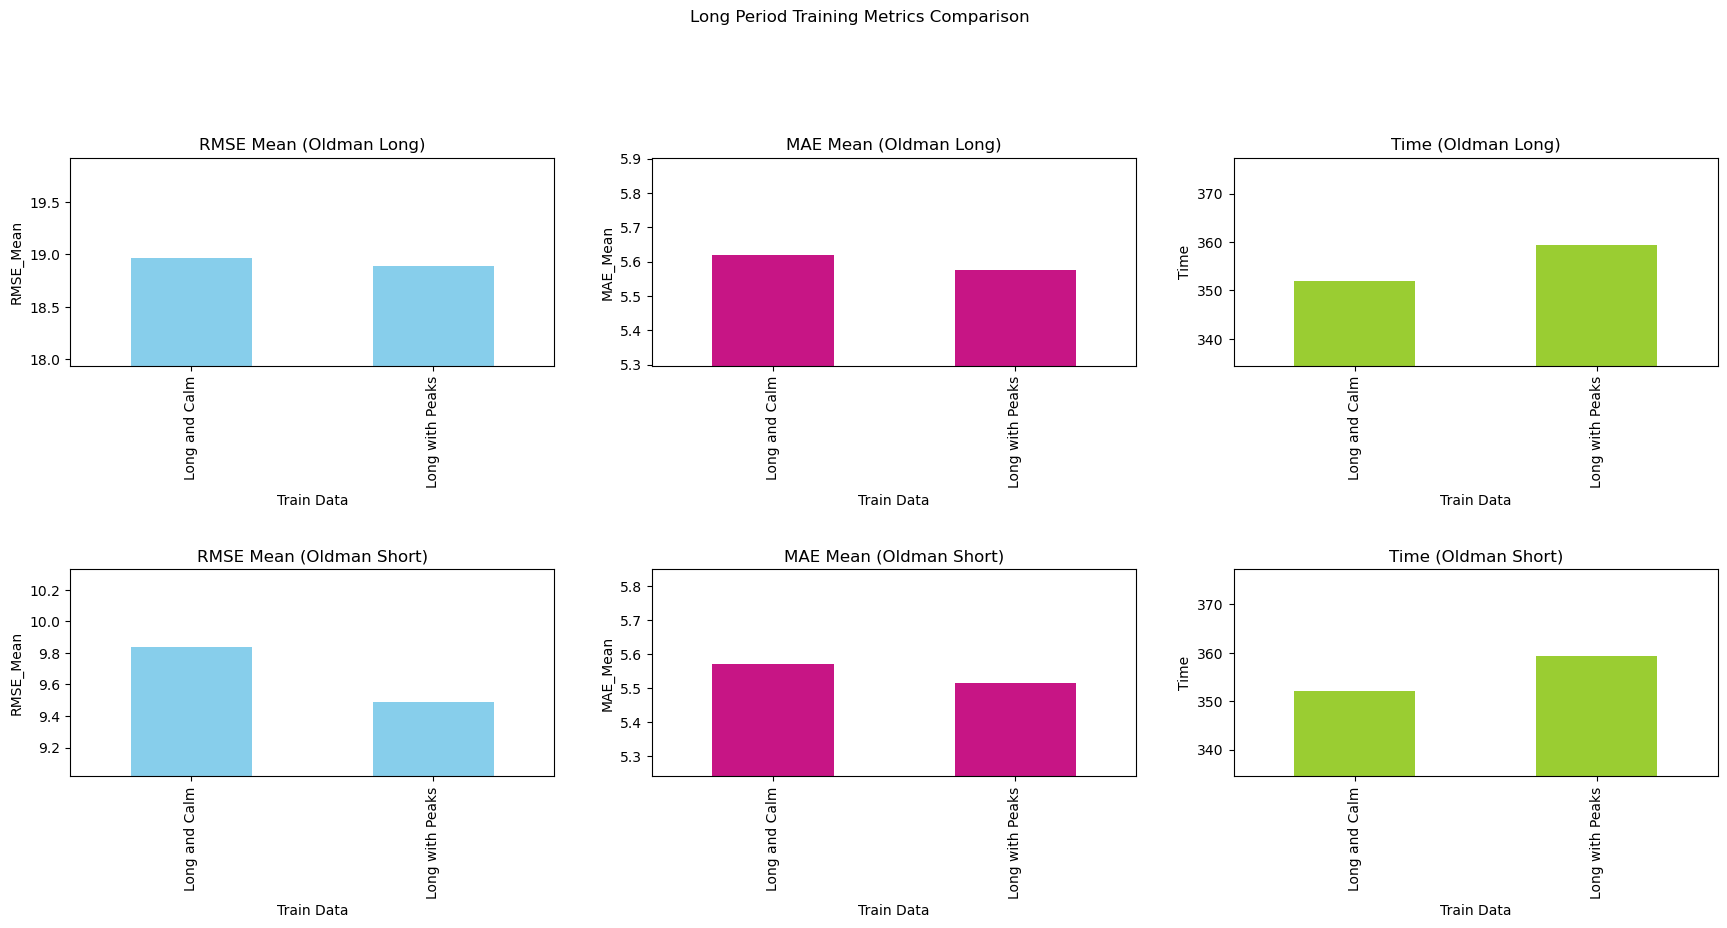

In [4]:
visualize("long_train", "Long Period Training Metrics Comparison")

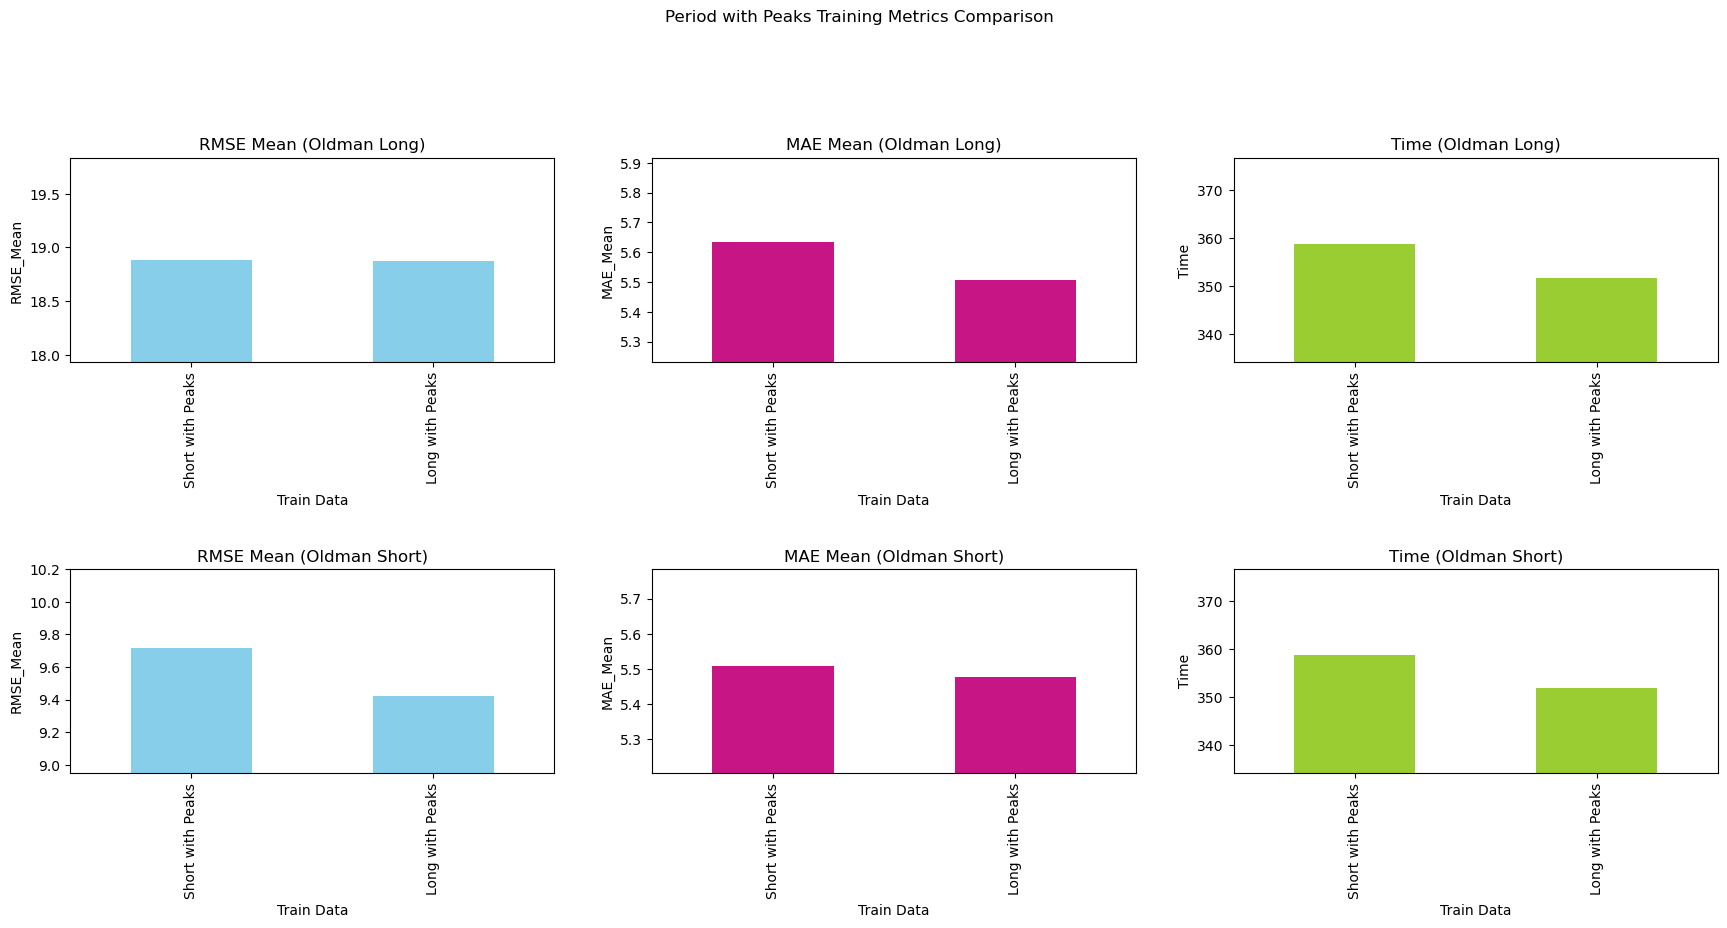

In [5]:
visualize("length_train", "Period with Peaks Training Metrics Comparison")

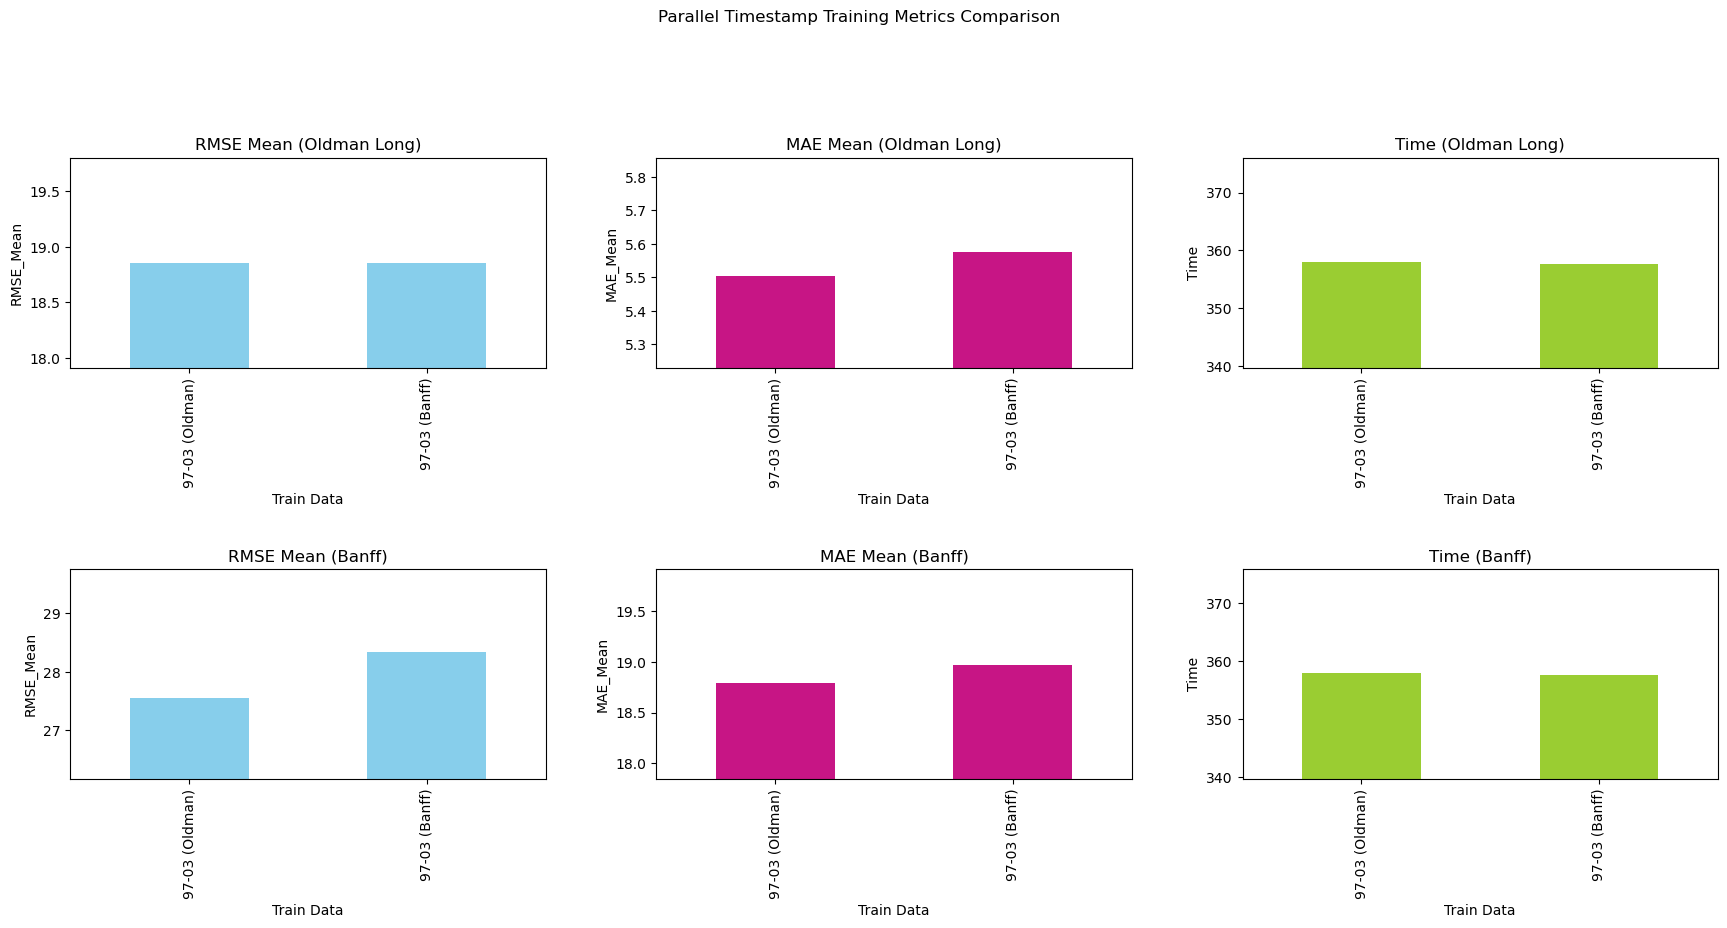

In [6]:
visualize("data_train", "Parallel Timestamp Training Metrics Comparison")

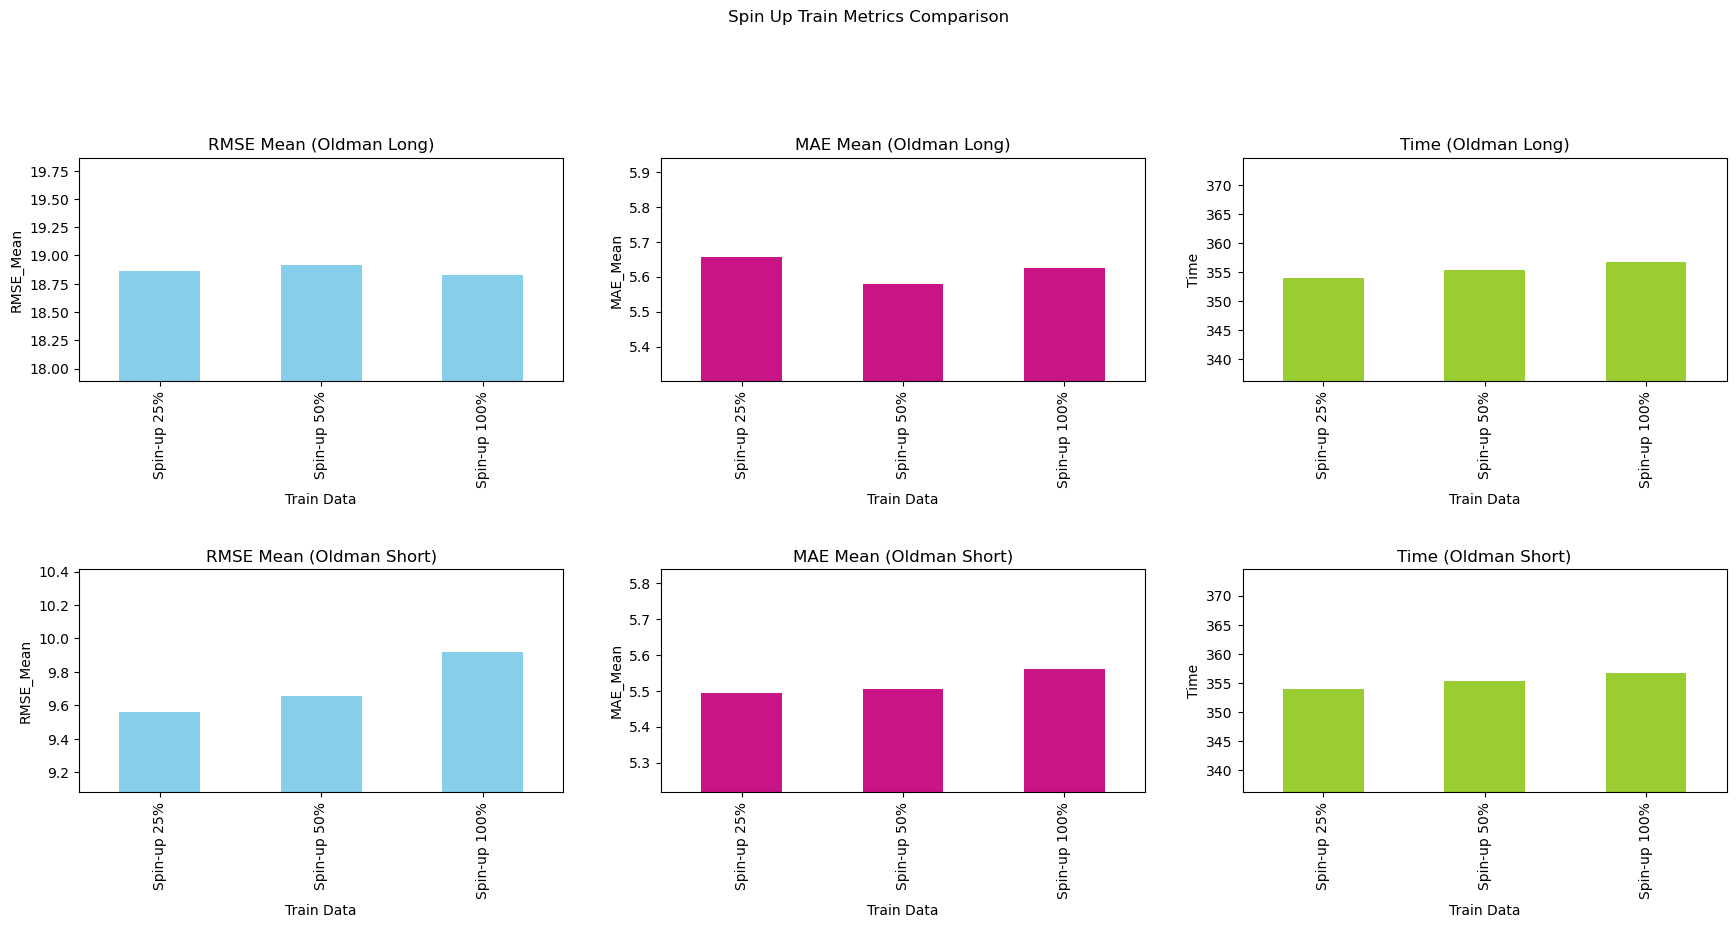

In [7]:
visualize("spin_up_train", "Spin Up Train Metrics Comparison")